In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('kidney_disease.csv')

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.drop('id', axis = 1, inplace = True)

In [8]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df.shape

(400, 25)

In [10]:
df.columns = ['Age','Blood_Pressure','Specific_Gravity','Albumin','Suger','Red_Blood_Cells','Pus_Cells',
              'Pus_Cell_Clumps','Bacteria','Blood_Glucose_Random','Blood_Urea','Serum_Creatinine','Sodium',
              'Potassium','Hemoglobin','Packed_Cell_Volume','White_Blood_Cell_counts','Red_Blood_Cells_Counts','Hypertension'
              ,'Diabetes_Mellitus','Coronary_Artery_Disease','Appetite','Pedal_Edema','Anemia','Classification']

In [11]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

In [12]:
df.describe()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Suger,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
df.dtypes

,0
Age,float64
Blood_Pressure,float64
Specific_Gravity,float64
Albumin,float64
Suger,float64
Red_Blood_Cells,object
Pus_Cells,object
Pus_Cell_Clumps,object
Bacteria,object
Blood_Glucose_Random,float64


In [14]:
df.White_Blood_Cell_counts.unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [15]:
df.White_Blood_Cell_counts = pd.to_numeric(df.White_Blood_Cell_counts, errors = 'coerce')

In [16]:
#Coerce meaning supress the error or Ignore

In [17]:
df.White_Blood_Cell_counts.dtypes

dtype('float64')

In [18]:
df.White_Blood_Cell_counts.unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [19]:
#due to some strings values in the column its an object column but say still you
#want to convert to numeric value, Use pd.to_numeric, supress the error and convert it into Nan

In [20]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

In [21]:
df.Packed_Cell_Volume.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [22]:
df['Packed_Cell_Volume'] = pd.to_numeric(df.Packed_Cell_Volume, errors= 'coerce')

In [27]:
df.Packed_Cell_Volume.unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [28]:
df.Red_Blood_Cells_Counts = pd.to_numeric(df.Red_Blood_Cells_Counts, errors = 'coerce')

In [32]:
df.Red_Blood_Cells_Counts.unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1,
       5.8, 5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Suger                    351 non-null    float64
 5   Red_Blood_Cells          248 non-null    object 
 6   Pus_Cells                335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blood_Urea               381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [43]:
df.isnull().sum()

,0
Age,9
Blood_Pressure,12
Specific_Gravity,47
Albumin,46
Suger,49
Red_Blood_Cells,152
Pus_Cells,65
Pus_Cell_Clumps,4
Bacteria,4
Blood_Glucose_Random,44


In [49]:
cat_[col for col in df.columns if df[col].dtype == 'O']

['Red_Blood_Cells',
 'Pus_Cells',
 'Pus_Cell_Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes_Mellitus',
 'Coronary_Artery_Disease',
 'Appetite',
 'Pedal_Edema',
 'Anemia',
 'Classification']

In [51]:
categorical_col = [col for col in df.columns if df[col].dtype == 'O']

In [52]:
Numerical_col = [col for col in df.columns if df[col].dtype != 'O']

In [53]:
Numerical_col, categorical_col

(['Age',
  'Blood_Pressure',
  'Specific_Gravity',
  'Albumin',
  'Suger',
  'Blood_Glucose_Random',
  'Blood_Urea',
  'Serum_Creatinine',
  'Sodium',
  'Potassium',
  'Hemoglobin',
  'Packed_Cell_Volume',
  'White_Blood_Cell_counts',
  'Red_Blood_Cells_Counts'],
 ['Red_Blood_Cells',
  'Pus_Cells',
  'Pus_Cell_Clumps',
  'Bacteria',
  'Hypertension',
  'Diabetes_Mellitus',
  'Coronary_Artery_Disease',
  'Appetite',
  'Pedal_Edema',
  'Anemia',
  'Classification'])

In [55]:
for col in categorical_col:
    print(f'{col}: {df[col].unique()}\n')

Red_Blood_Cells: [nan 'normal' 'abnormal']

Pus_Cells: ['normal' 'abnormal' nan]

Pus_Cell_Clumps: ['notpresent' 'present' nan]

Bacteria: ['notpresent' 'present' nan]

Hypertension: ['yes' 'no' nan]

Diabetes_Mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]

Coronary_Artery_Disease: ['no' 'yes' '\tno' nan]

Appetite: ['good' 'poor' nan]

Pedal_Edema: ['no' 'yes' nan]

Anemia: ['no' 'yes' nan]

Classification: ['ckd' 'ckd\t' 'notckd']



In [57]:
for col in Numerical_col:
  print(f'{col}: {df[col].dtypes}\n')

Age: float64

Blood_Pressure: float64

Specific_Gravity: float64

Albumin: float64

Suger: float64

Blood_Glucose_Random: float64

Blood_Urea: float64

Serum_Creatinine: float64

Sodium: float64

Potassium: float64

Hemoglobin: float64

Packed_Cell_Volume: float64

White_Blood_Cell_counts: float64

Red_Blood_Cells_Counts: float64



In [59]:
a = 'ckd\t'
a.str.replace('\t', '')

AttributeError: 'str' object has no attribute 'str'

AttributeError: 'str' object has no attribute 'str'

In [65]:
df.Diabetes_Mellitus.replace(to_replace ={' yes' : 'yes', '\tno': 'no', '\tyes':'yes'}, inplace = True)

In [73]:
for col in categorical_col:
    print(f'{col}: {df[col].unique()}\n')


Red_Blood_Cells: [nan 'normal' 'abnormal']

Pus_Cells: ['normal' 'abnormal' nan]

Pus_Cell_Clumps: ['notpresent' 'present' nan]

Bacteria: ['notpresent' 'present' nan]

Hypertension: ['yes' 'no' nan]

Diabetes_Mellitus: ['yes' 'no' nan]

Coronary_Artery_Disease: ['no' 'yes' nan]

Appetite: ['good' 'poor' nan]

Pedal_Edema: ['no' 'yes' nan]

Anemia: ['no' 'yes' nan]

Classification: ['ckd' 'notckd']



In [68]:
df.Coronary_Artery_Disease.replace(to_replace= {'\tno': 'no'}, inplace = True)

In [72]:
df.Classification.replace(to_replace = {'ckd\t': 'ckd'}, inplace = True)

In [ ]:
#You could have also replace and then map with 1 and 0
df['Classification'] = df['Classification'].map({'ckd': 1, 'notckd': 0, 'ckd\t' = 1})

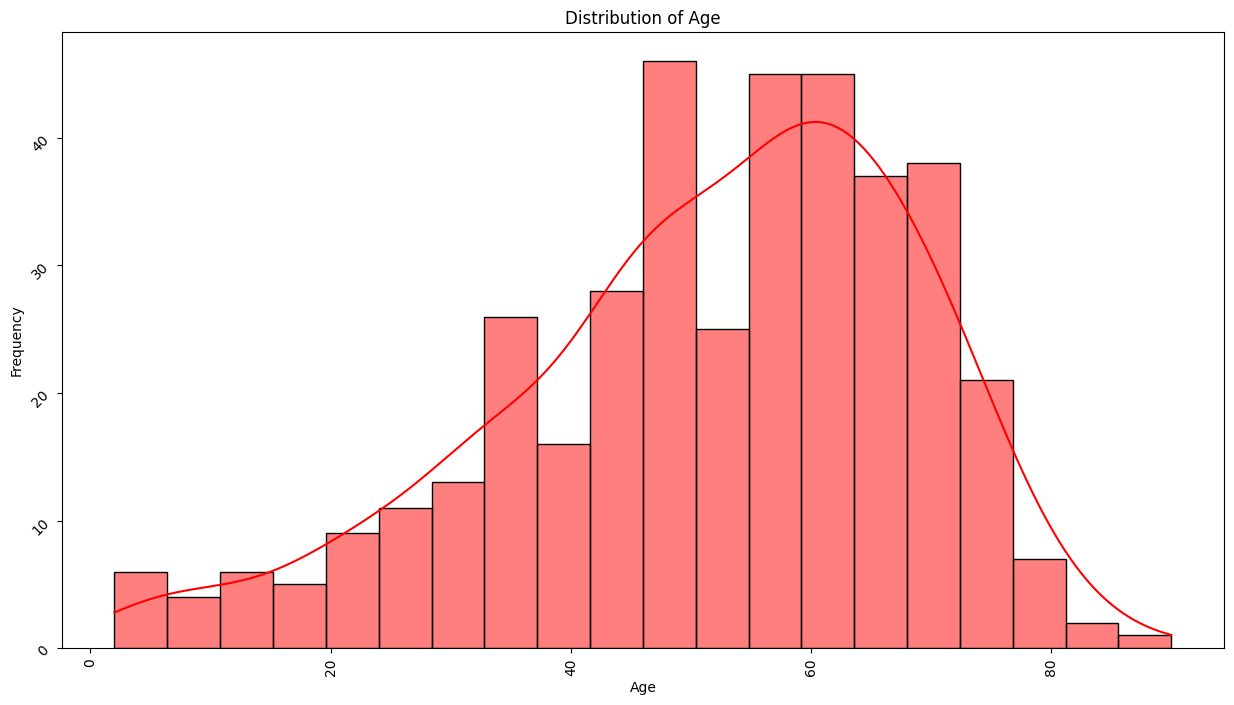

In [84]:
#Univariate Analysis
plt.figure(figsize = (15,8))
sns.histplot(df['Age'].dropna(), kde = True,bins = 20,  color = 'r')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()


In [ ]:
#insights:- Age is Left Skewed data

In [85]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Hypertension', ylabel='count'>

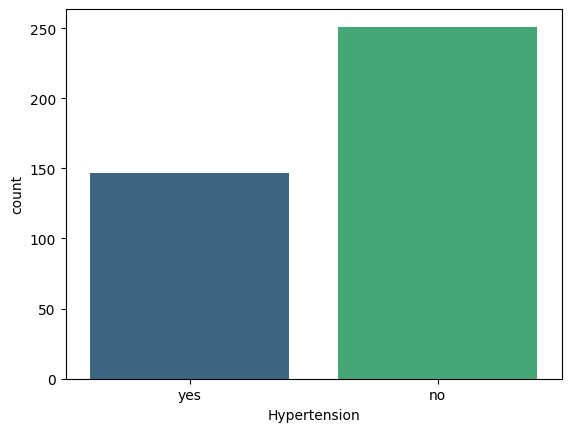

In [93]:
sns.countplot(x = 'Hypertension', data = df, palette= 'viridis' )

In [ ]:
#insights:- 150 of them has hypertension

In [94]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Classification', ylabel='Blood_Urea'>

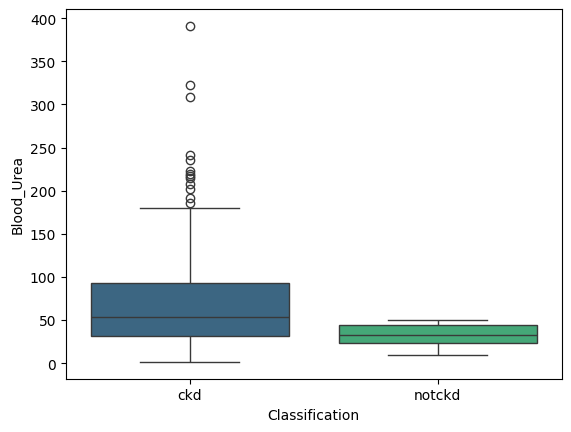

In [96]:
sns.boxplot(x = 'Classification', y = 'Blood_Urea', data =df, palette = 'viridis')

In [ ]:
#insight:- people with kidney diseases has higher blood_Urea with outliers, Median value is also higher

<Axes: xlabel='Classification', ylabel='Serum_Creatinine'>

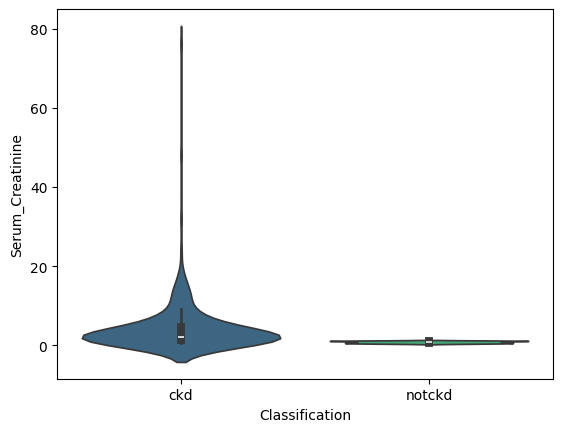

In [98]:
sns.violinplot(x = 'Classification', y = 'Serum_Creatinine', data = df, palette = 'viridis')

In [99]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Anemia', ylabel='count'>

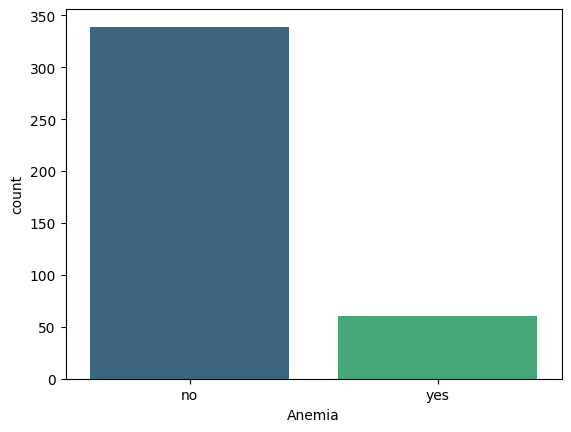

In [124]:
sns.countplot(x = 'Anemia', data = df, palette = 'viridis')

In [ ]:
#insights:- Majority of the people not suffering from Anemia

In [105]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: ylabel='count'>

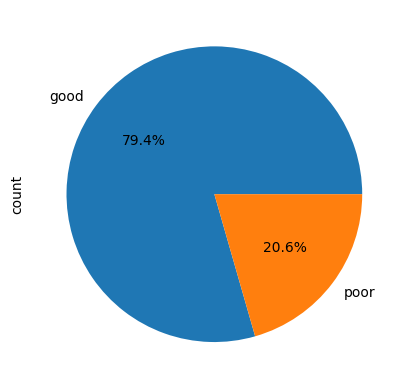

In [112]:
df.Appetite.value_counts().plot.pie(autopct = '%1.1f%%')
#this is the basic colors

<Axes: ylabel='count'>

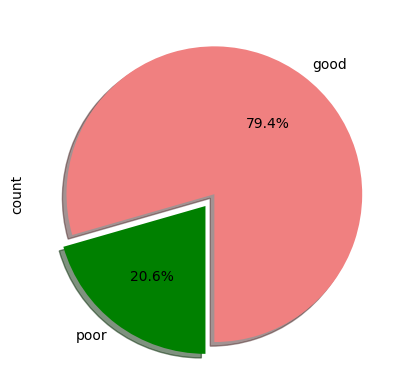

In [121]:
df.Appetite.value_counts().plot.pie(colors = ['lightcoral', 'green'], autopct = '%1.1f%%', explode = [0,0.1],shadow = True, startangle = 270 )
#making chart more beautiful

In [125]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: ylabel='count'>

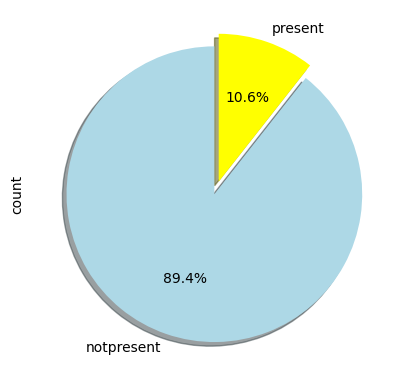

In [134]:
df.Pus_Cell_Clumps.value_counts().plot.pie(colors = ['lightblue','yellow'],autopct = '%1.1f%%', shadow = True, startangle = 90, explode = [0,0.09])

<Axes: xlabel='Pus_Cell_Clumps', ylabel='count'>

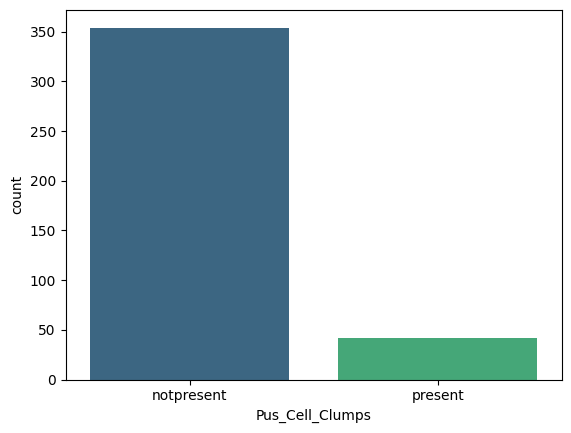

In [141]:
sns.countplot(x = 'Pus_Cell_Clumps', data = df, palette = 'viridis')

In [ ]:
#insight:- Pus_Cell_clumps is not present in most of the people

In [ ]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='White_Blood_Cell_counts', ylabel='Count'>

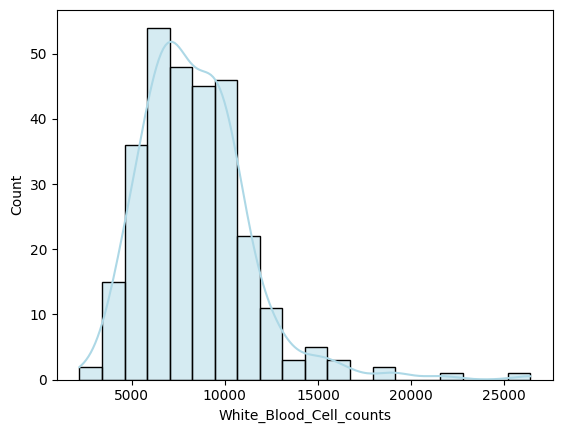

In [146]:
sns.histplot(x = 'White_Blood_Cell_counts', data = df,bins = 20, kde = True, color = 'lightblue')

In [151]:
#Donut plot = donot chart or ring chart. It is essentially a pie chart with a hole in center
#By specifying wedgeprops value
#used to display proportions

<Axes: ylabel='count'>

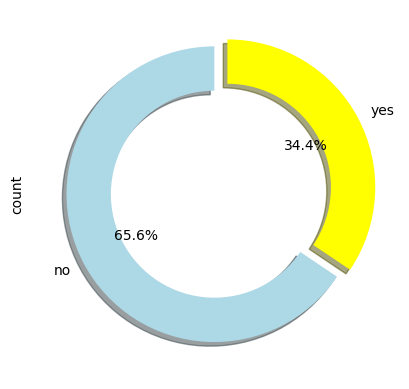

In [156]:
df.Diabetes_Mellitus.value_counts().plot.pie(autopct = '%1.1f%%', wedgeprops = dict(width = 0.3), shadow = True, startangle = 90, explode = [0,0.1], colors = ['lightblue', 'yellow'])

<Axes: xlabel='Coronary_Artery_Disease', ylabel='count'>

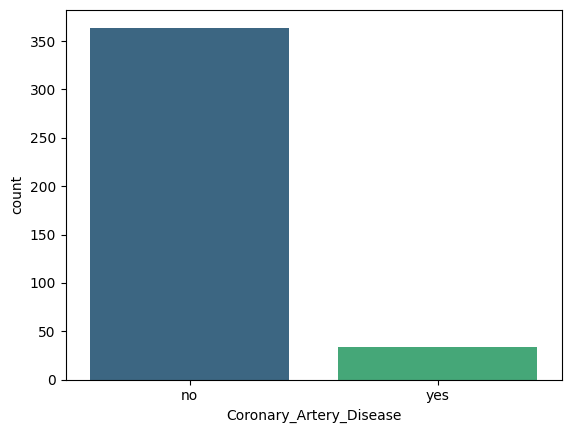

In [162]:
sns.countplot(x = 'Coronary_Artery_Disease', data = df, palette = 'viridis', color = 'r')

<Axes: xlabel='Pedal_Edema', ylabel='count'>

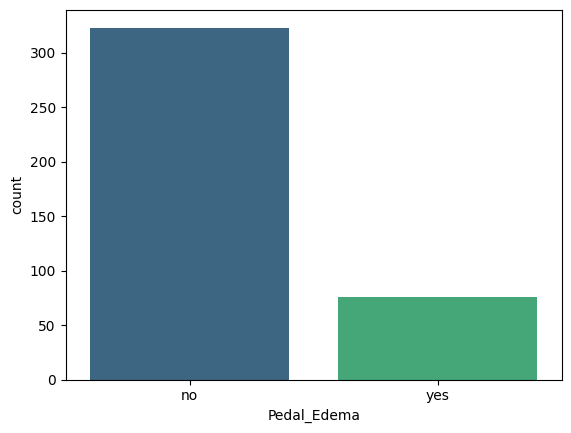

In [164]:
sns.countplot(x = 'Pedal_Edema', data = df, palette = 'viridis')

<Axes: xlabel='Pedal_Edema', ylabel='Red_Blood_Cells_Counts'>

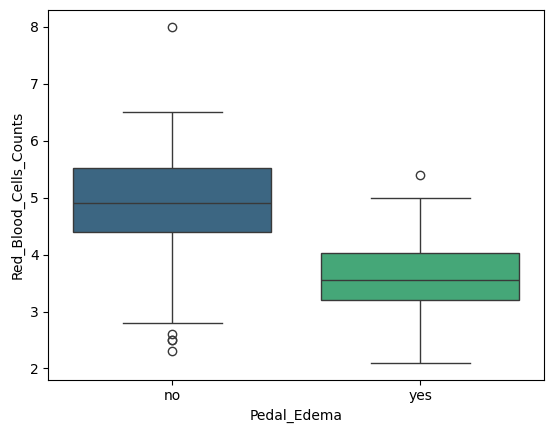

In [166]:
sns.boxplot(x = 'Pedal_Edema', y = 'Red_Blood_Cells_Counts', data = df, palette = 'viridis')

In [167]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Blood_Pressure'>

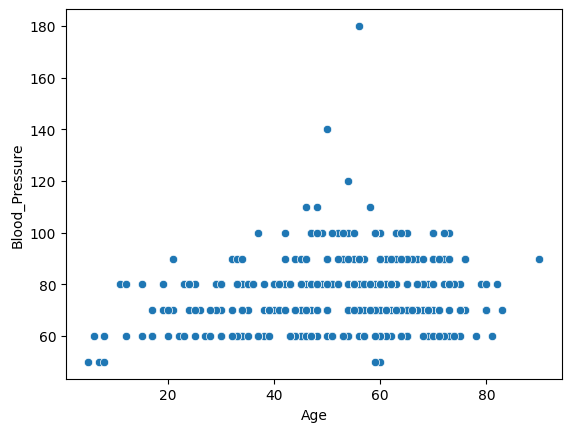

In [173]:
#Bi Variate Analysis
sns.scatterplot(x = 'Age', y = 'Blood_Pressure', data = df)

In [ ]:
#insights:- age is increasing, Blood Presssure is also Increasing

<Axes: xlabel='Age', ylabel='Blood_Pressure'>

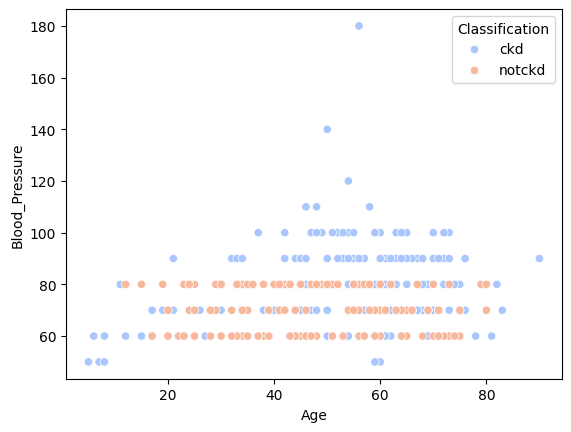

In [177]:
sns.scatterplot(x = 'Age', y = 'Blood_Pressure', data = df, hue = 'Classification', palette = 'coolwarm')

In [ ]:
#insights:- age and Blood_pressure is increasing, then Kidney Disease is also increasing

In [178]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Diabetes_Mellitus', ylabel='Albumin'>

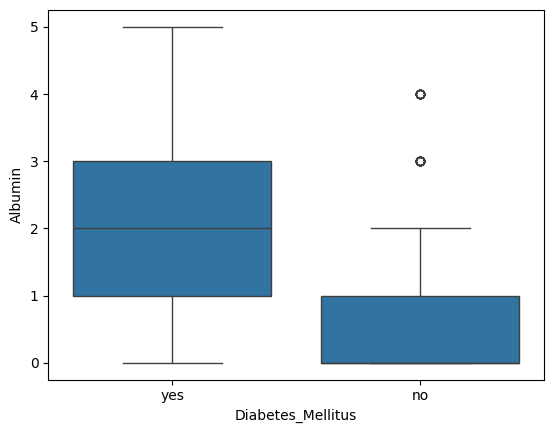

In [179]:
sns.boxplot(x = 'Diabetes_Mellitus', y = 'Albumin', data = df)

<Axes: xlabel='Diabetes_Mellitus', ylabel='Albumin'>

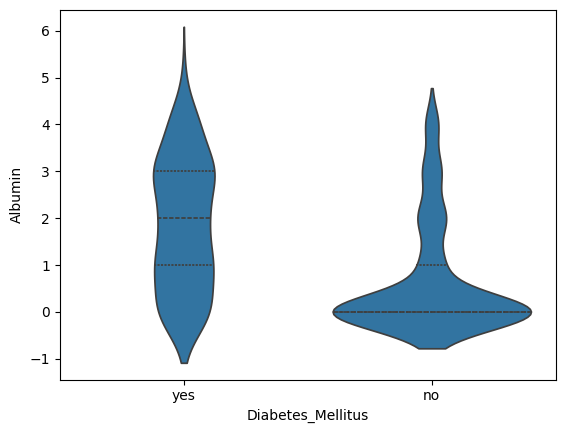

In [181]:
sns.violinplot(x = 'Diabetes_Mellitus', y = 'Albumin', data = df, inner = 'quartile')

In [ ]:
#in violinplot if it is stressed there are some outliers in it

In [185]:
#Stacked Bar Chart>> Diabetes_Mellitus and Hypertension
#Crosstab summerizes the data
diab = pd.crosstab(df['Diabetes_Mellitus'],df['Hypertension'])


<Axes: xlabel='Diabetes_Mellitus'>

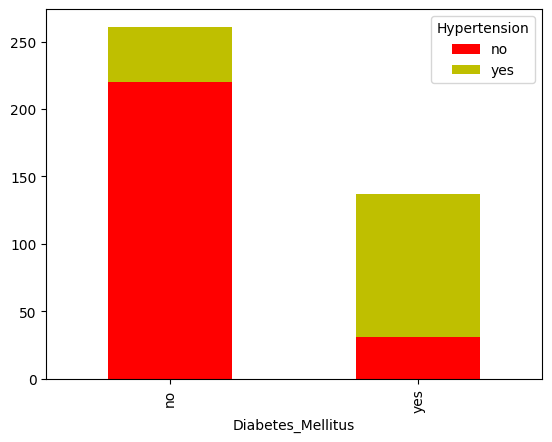

In [187]:
from inspect import stack
diab.plot(kind = 'bar', stacked = True, color = ['r','y'])

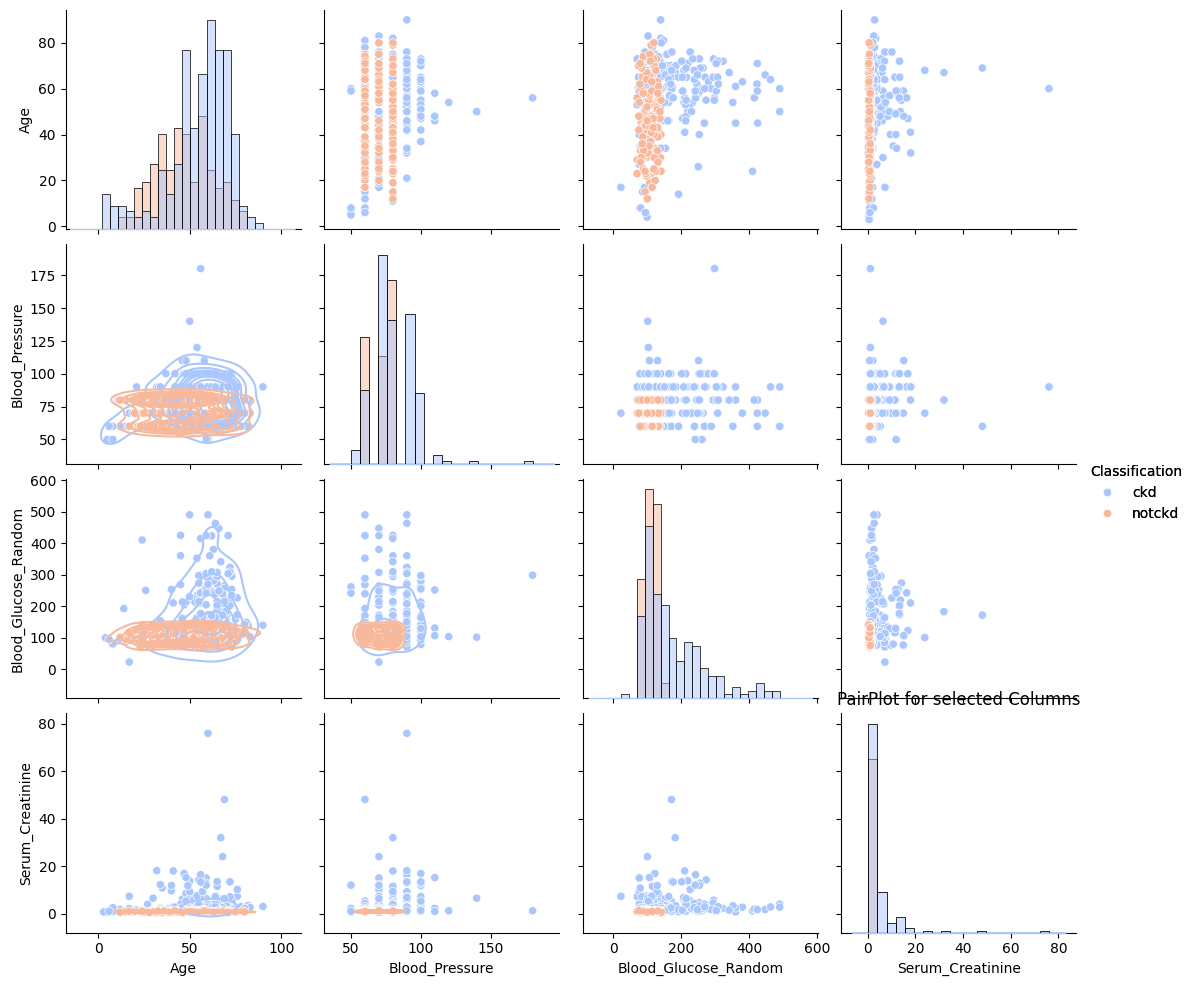

In [197]:
#Multivariate Analysis:- Multiple features at a time
#Customized Pair Plot
col = ['Age','Blood_Pressure','Blood_Glucose_Random','Serum_Creatinine','Classification']
g = sns.pairplot(df[col], hue = 'Classification', palette = 'coolwarm')
g.map_upper(sns.scatterplot, palette = 'husl') #Upper Corner Plot
g.map_lower(sns.kdeplot, cmap = 'Blues_d') #Lower Corner Plot
g.map_diag(sns.histplot, bins = 20, color = 'r')  #Diagonal Plot
g.add_legend()
plt.title('PairPlot for selected Columns')
plt.show()

In [199]:
corr = df.corr(numeric_only = True)

<Axes: >

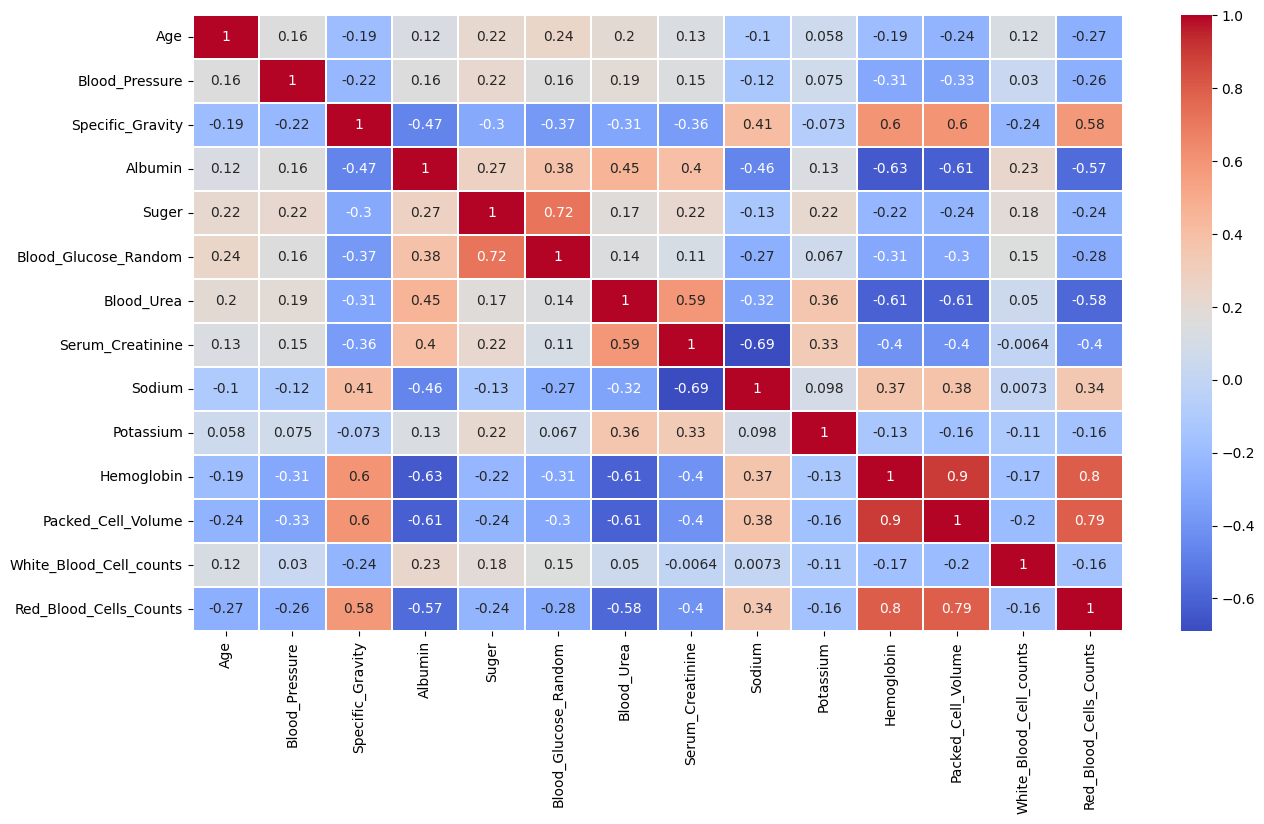

In [204]:
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 0.3)

In [205]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Suger',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_counts', 'Red_Blood_Cells_Counts', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Diabetes_Mellitus', ylabel='Age'>

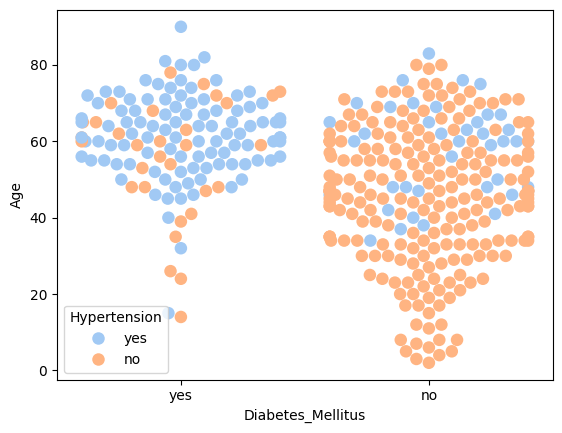

In [207]:
sns.swarmplot(x = 'Diabetes_Mellitus', y = 'Age', hue = 'Hypertension', data = df, palette = 'pastel', size= 9)

In [212]:
#Swarm plot allow to see all the overlapping data as well
fig = px.scatter(df, x = 'Age', y = 'Blood_Pressure', color = 'Classification')
fig.show()

In [214]:
fig = px.scatter(df, x = 'Age', y = 'Blood_Pressure', color = 'Classification',hover_data = ['Serum_Creatinine', 'Hemoglobin'],title = 'Interactive Scatter Plot')
fig.show()

In [217]:
fig = px.scatter_3d(df, x = 'Age', y = 'Blood_Pressure', z = 'Serum_Creatinine', color = 'Classification', title = '3D Scatter Plot')
fig.show()

In [222]:
corr

,Age,Blood_Pressure,Specific_Gravity,Albumin,Suger,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed_Cell_Volume,White_Blood_Cell_counts,Red_Blood_Cells_Counts
Age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
Blood_Pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
Specific_Gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
Albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
Suger,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
Blood_Glucose_Random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
Blood_Urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
Serum_Creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
Sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
Potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


In [225]:
import plotly.graph_objects as go
fig = go.Figure(data = go.Heatmap(z = corr.values, x = corr.columns, y = corr.index))
fig.show()

In [229]:
df.isnull().sum()

,0
Age,9
Blood_Pressure,12
Specific_Gravity,47
Albumin,46
Suger,49
Red_Blood_Cells,152
Pus_Cells,65
Pus_Cell_Clumps,4
Bacteria,4
Blood_Glucose_Random,44


In [232]:
median = df[Numerical_col].median()

In [234]:
df[Numerical_col] = df[Numerical_col].fillna(median)

In [235]:
df.isnull().sum()

,0
Age,0
Blood_Pressure,0
Specific_Gravity,0
Albumin,0
Suger,0
Red_Blood_Cells,152
Pus_Cells,65
Pus_Cell_Clumps,4
Bacteria,4
Blood_Glucose_Random,0


In [236]:
df[categorical_col] = df[categorical_col].fillna(df.mode().iloc[0])

In [238]:
df.dtypes

,0
Age,float64
Blood_Pressure,float64
Specific_Gravity,float64
Albumin,float64
Suger,float64
Red_Blood_Cells,object
Pus_Cells,object
Pus_Cell_Clumps,object
Bacteria,object
Blood_Glucose_Random,float64


In [ ]:
#Few Columns are object columns>> convert objects to numerical

In [240]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in categorical_col:
    df[col] = lb.fit_transform(df[col])

In [241]:
df.dtypes

,0
Age,float64
Blood_Pressure,float64
Specific_Gravity,float64
Albumin,float64
Suger,float64
Red_Blood_Cells,int64
Pus_Cells,int64
Pus_Cell_Clumps,int64
Bacteria,int64
Blood_Glucose_Random,float64


In [242]:
df.head(15)

,Age,Blood_Pressure,Specific_Gravity,Albumin,Suger,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_counts,Red_Blood_Cells_Counts,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,0
6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,100.0,...,36.0,8000.0,4.8,0,0,0,0,0,0,0
7,24.0,80.0,1.015,2.0,4.0,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,0,1,0,0
8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,0,0,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,1,0,1,0


In [243]:
x = df.drop('Classification', axis = 1)
y = df['Classification']

In [244]:
y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1
